# Veri Çerçevesi hakkında

**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Acknowledgements**

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

**Inspiration**

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

**About This File**

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Özniteliklerin Açıklamaları

**Pregnancies:** Number of times pregnant

**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure:** Diastolic blood pressure (mm Hg)

**SkinThickness:** Triceps skin fold thickness (mm)

**Insulin:** 2-Hour serum insulin (mu U/ml)

**BMI:** Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction:** Diabetes pedigree function

**Age:** Age (years)

**Outcome:** Class variable (0 or 1) 268 of 768 are 1, the others are 0


Veri analiz sürecinde bize yardımcı olacak kütüphanelerimizi import ederek işe başlayalım.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


Kütüphanelerimizi import ettik. Şimdi de kullanıcağımız veri çerçevesini ekleyelim.

In [79]:
data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

İlk 5 gözlemi inceleyelim.

In [80]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Son 5 gözlemi inceleyelim.

In [81]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Rastgele olacak şekilde 5 gözlemi inceleyelim.

In [82]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
384,1,125,70,24,110,24.3,0.221,25,0
687,1,107,50,19,0,28.3,0.181,29,0
211,0,147,85,54,0,42.8,0.375,24,0
486,1,139,62,41,480,40.7,0.536,21,0
33,6,92,92,0,0,19.9,0.188,28,0


Veri setinin değişken ve gözlem sayısını öğrenelim.

In [83]:
data.shape

(768, 9)

Özniteliklerimizi inceleyelim.

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Bilgileri incelersek ; 9 kolonun olduğunu, kolonların tiplerini ve bellek kullanımlarını öğrenebiliriz.

Eksik değer olup olmadığına bakalım.

In [85]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Görüldüğü gibi veri setimizde eksik veri bulunmamaktadır.

Sayısal değişkenlerin istatistik bilgilerini inceleyelim.

In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Sonuçlara baktığımızda bazı özniteliklerin minimum değerlerinin 0 olduğunu görebiliriz. Ancak bu özniteliklerden "Glucose", "BloodPressure", "SkinThickness", "Insulin" ve "BMI" özniteliklerinin değerlerinin 0 olması imkansızdır.
Değerlerin 0 olmasının nedenini eksik değerlerin yerine "0" yazılmış olması olabilir. Değeri 0 olan verileri NAN olarak değiştirmemiz gerekir. Bu değiştirme işlemini boş verilerin istatistik değerlerini etkilemesini istemediğimiz için yapıyoruz.

In [87]:
data.loc[data["Glucose"] == 0.0, "Glucose"] = np.NAN
data.loc[data["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
data.loc[data["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
data.loc[data["Insulin"] == 0.0, "Insulin"] = np.NAN
data.loc[data["BMI"] == 0.0, "BMI"] = np.NAN

Değiştirme işleminden sonra eksik verilerimizi inceleyelim.

In [88]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Eksik verilerimizi düzenlemeye başlamadan önce missingno kütüphanesini kullanarak aralarındaki ilişkiyi inceleyelim.

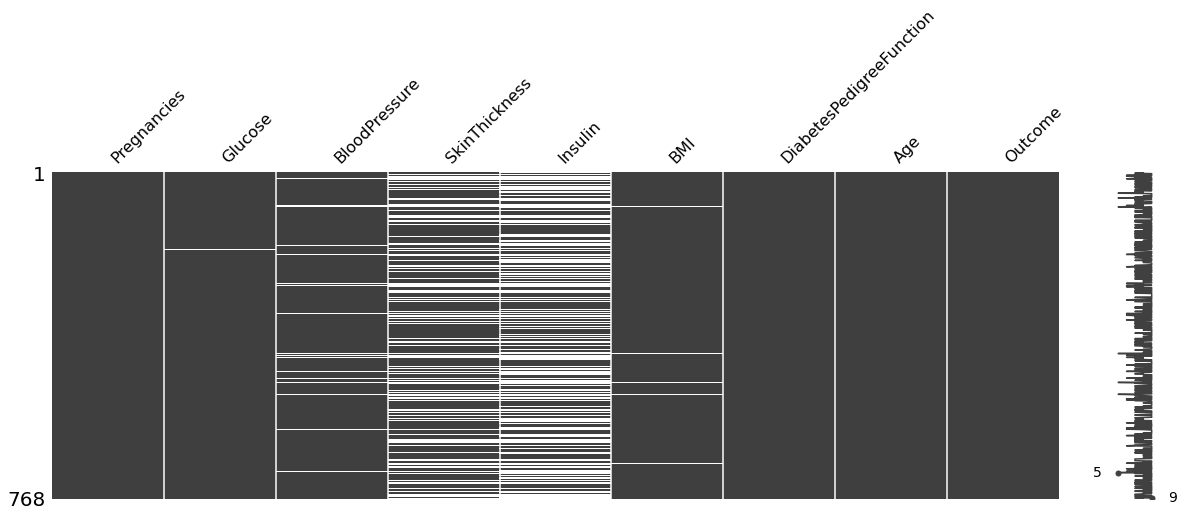

In [89]:
mno.matrix(data, figsize = (20, 6))

Aralarındaki ilişkiyi daha iyi anlamak için eksik verilerimizi görselleştirelim.

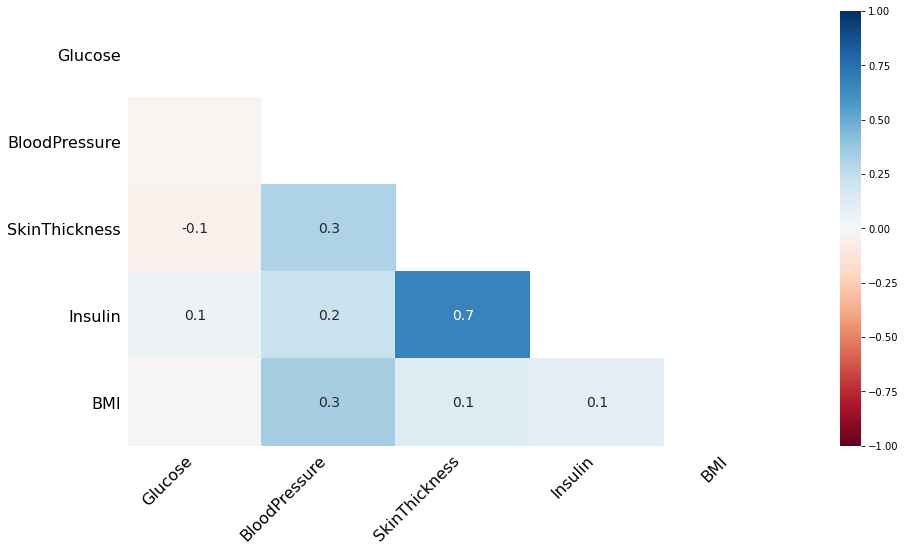

In [90]:
mno.heatmap(data, figsize= (15,8));

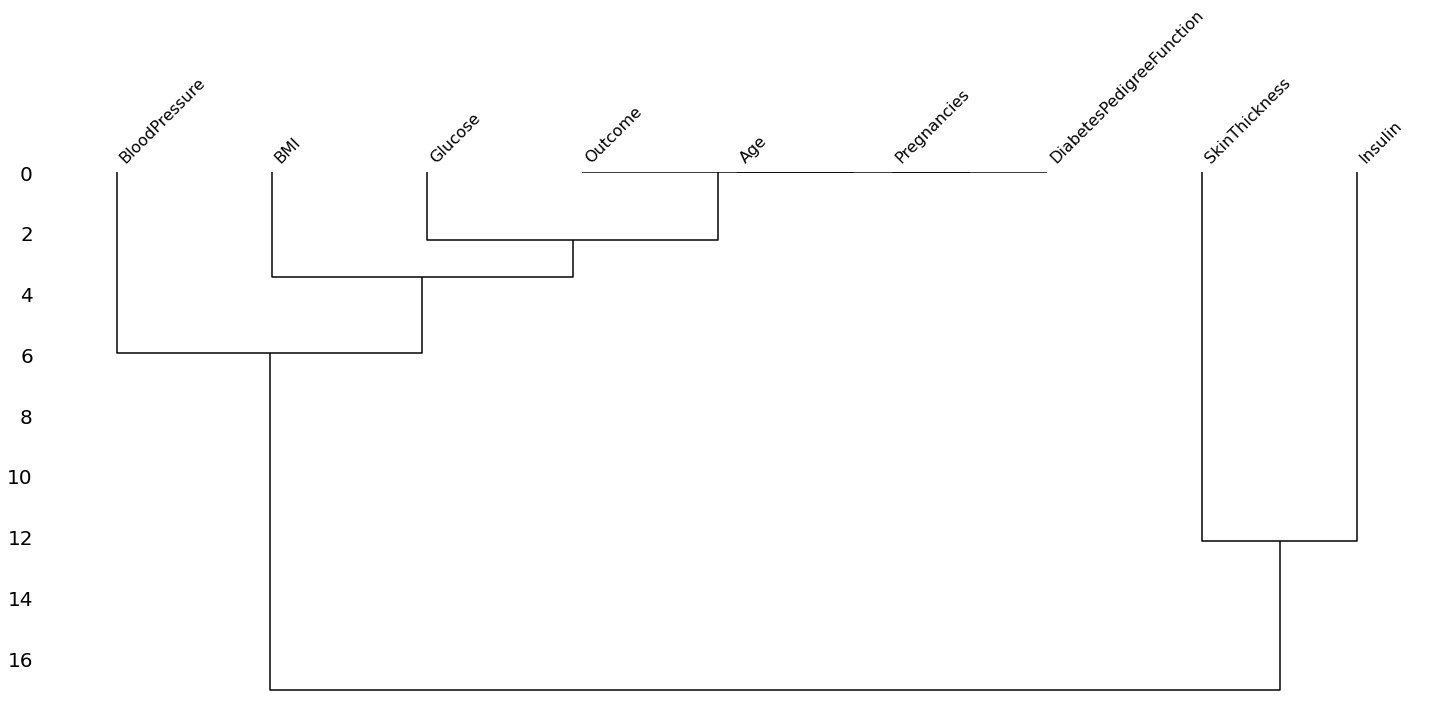

In [91]:
mno.dendrogram(data)

Görselleri inceleyerek "Insulin" ve "SkinThickness" özniteliklerinin eksik verilerinin arasında pozitif bir ilişki olduğunu gözlemyelebiliriz.

Eksik verileri ortalamaları veye medyanlarıyla dolduralım. Dağılımlarına bakarak nasıl doldurcağımıza karar verebiliriz. Dağılımlarına öğrenmek için seaborn kütüphanesi yardımıyla keman grafiğini oluşturarak inceleyebiliriz. Dağılımların normal olduğu öznitelikleri ortalamalarıyla, dağılımların alt veya üst sınırlara doğru olduğu öznitelikleri medyanlarıyla dolduralim.

In [92]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

"Glucose" özniteliğinin ortalamasını ve medyanını öğrenelim

In [93]:
"|","Ortalama: ", data.Glucose.mean(),"|","Medyan: ", data.Glucose.median(), "|"

('|', 'Ortalama: ', 121.6867627785059, '|', 'Medyan: ', 117.0, '|')

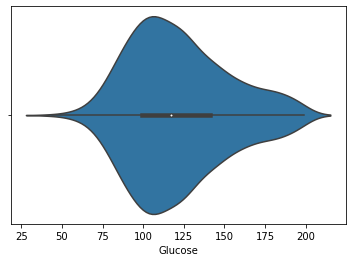

In [94]:
sns.violinplot(data["Glucose"])

"Glucose" özniteliğinin normal bir dağılımı olduğunu söyleyebiliriz bu yüzden eksik verileri ortalamalarla dolduralım.

In [95]:
data["Glucose"].fillna(data["Glucose"].mean(), inplace = True)
data.Glucose.isnull().sum()

0

"BloodPressure" özniteliğinin ortalamasını ve medyanını öğrenelim

In [96]:
"|","Ortalama: ", data.BloodPressure.mean(),"|","Medyan: ", data.BloodPressure.median(), "|"

('|', 'Ortalama: ', 72.40518417462484, '|', 'Medyan: ', 72.0, '|')

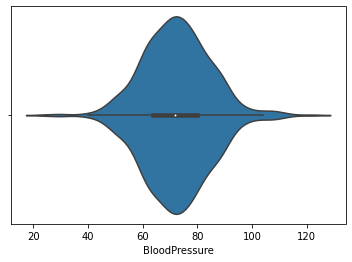

In [97]:
sns.violinplot(data["BloodPressure"])

"BloodPressure" özniteliğinin normal bir dağılımı olduğunu söyleyebiliriz bu yüzden eksik verileri ortalamalarla dolduralım.

In [98]:
data["BloodPressure"].fillna(data["BloodPressure"].mean(), inplace = True)
data.BloodPressure.isnull().sum()

0

"SkinThickness" özniteliğinin ortalamasını ve medyanını öğrenelim

In [99]:
"|","Ortalama: ", data.SkinThickness.mean(),"|","Medyan: ", data.SkinThickness.median(), "|"

('|', 'Ortalama: ', 29.153419593345657, '|', 'Medyan: ', 29.0, '|')

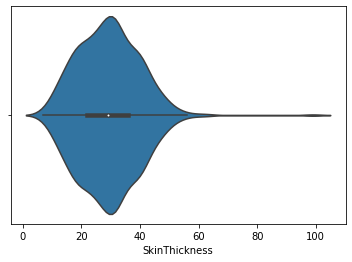

In [100]:
sns.violinplot(data["SkinThickness"])

"SkinThickness" özniteliğinin normal olmayan bir dağılımı olduğunu söyleyebiliriz bu yüzden eksik verileri medyanlarla dolduralım.

In [101]:
data["SkinThickness"].fillna(data["SkinThickness"].median(), inplace = True)
data.SkinThickness.isnull().sum()

0

"Insulin" özniteliğinin ortalamasını ve medyanını öğrenelim

In [102]:
"|","Ortalama: ", data.Insulin.mean(),"|","Medyan: ", data.Insulin.median(), "|"

('|', 'Ortalama: ', 155.5482233502538, '|', 'Medyan: ', 125.0, '|')

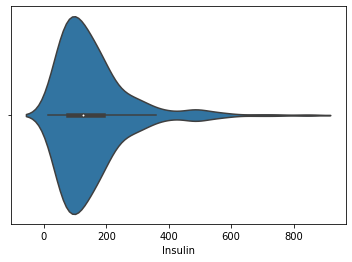

In [103]:
sns.violinplot(data["Insulin"])

"Insulin" özniteliğinin normal olmayan bir dağılımı olduğunu söyleyebiliriz bu yüzden eksik verileri medyanlarla dolduralım.

In [104]:
data["Insulin"].fillna(data["Insulin"].median(), inplace = True)
data.Insulin.isnull().sum()

0

"BMI" özniteliğinin ortalamasını ve medyanını öğrenelim

In [105]:
"|","Ortalama: ", data.BMI.mean(),"|","Medyan: ", data.BMI.median(), "|"

('|', 'Ortalama: ', 32.45746367239099, '|', 'Medyan: ', 32.3, '|')

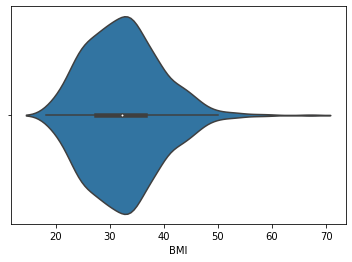

In [106]:
sns.violinplot(data["BMI"])

"BMI" özniteliğinin normal olmayan bir dağılımı olduğunu söyleyebiliriz bu yüzden eksik verileri medyanlarla dolduralım.

In [107]:
data["BMI"].fillna(data["BMI"].median(), inplace = True)
data.BMI.isnull().sum()

0

Tüm özniteliklerimizin eksik verilerini doldurduk.

In [108]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Eksik verilerimizi doldurduğumuza göre artık düzgün bir şekilde birdaha istatistiklerimizi inceleyelim.

In [109]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


Sayısal değerler arasında korelasyon olup olmadığını inceleyelim.


In [110]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


Daha rahat inceleyebilmek için ısı haritasını çizdirelim.

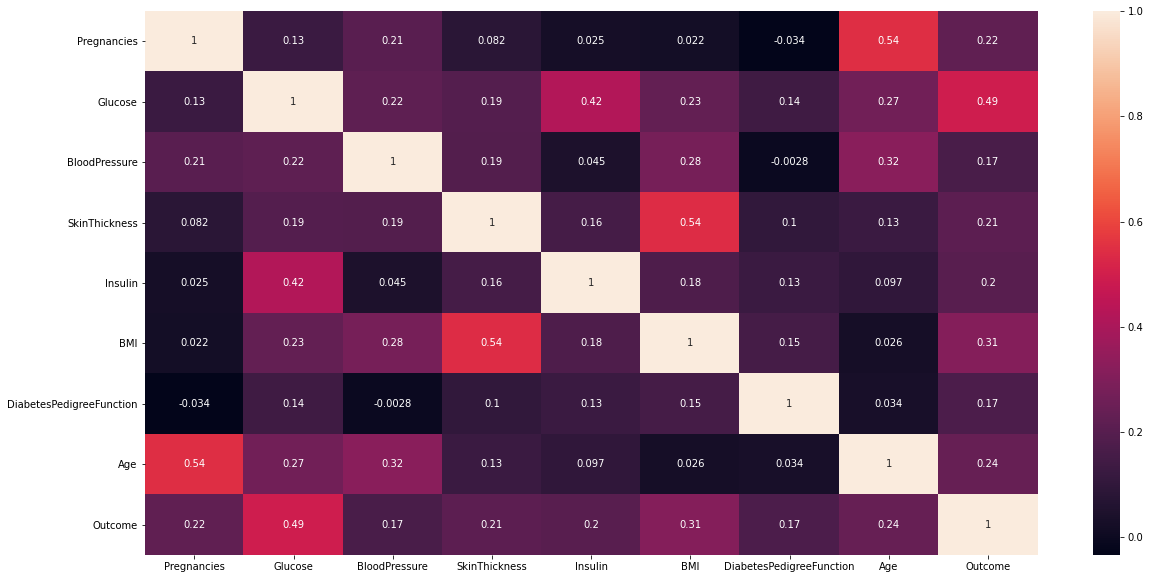

In [111]:
corr = data.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, ax=ax)

Korelasyon ısı haritasını incelediğimiz zaman en güçlü korelasyonların "Age"-"Pregnancies" , "BMI"-"SkinThickness" ve "Outcome"-"Glucose" arasında olduğunu gözlemleriz.

Bu bilgiden yola çıkarak;
- Yaşı fazla olan bireylerin gebe kalma sayısı daha fazladır
- Vicut kitle indeksi fazla olanların deri kalınlıkları daha fazladır 
- Glikoz seviyesi fazla olanların diyabet hastası olma ihtimalleri daha fazladır

Yorumlarını yapabiliriz

Öznitelikler arasındaki ilişkiyi daya iyi görebilmek için görselleştirelim.

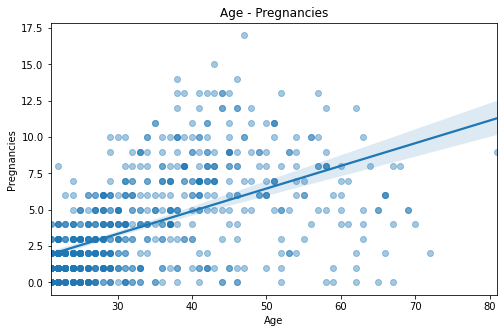

In [112]:
plt.figure(figsize=(8,5))
sns.regplot( x="Age", y="Pregnancies",data=data, scatter_kws={'alpha':0.4})
plt.title("Age - Pregnancies")
plt.show()

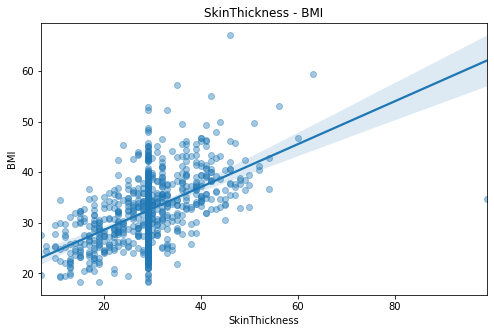

In [113]:
plt.figure(figsize=(8,5))
sns.regplot( x="SkinThickness", y="BMI",data=data, scatter_kws={'alpha':0.4})
plt.title("SkinThickness - BMI")
plt.show()

Grafikleri incelersek iki değer arasında pozitif bir ilişki olduğunu görebilriz.

Özniteliklerimiz arasındaki ilişkiyi incelerken regplot kullandık. Ancak Glucose ve Outcome öznitelikleri arasındaki ilişkiyi incelerken regplot kullanmamız doğru olmaz. Bunun sebebi Outcome özniteliğimizin tipinin binary olmasıdır.

Glucose değerini normal ve yüksek olmak üzere iki gruba ayıralım ve bu gruplar arasındaki outcome değerlerini inceleyelim. Pozitif bir ilişkide; yüksek glucose grubunda outcome=1 değerlerinin, normal glucose grubunda outcome=0 değerlerinin fazla olmalıdır.

In [114]:
highGlucose = data[data.Glucose>140]
normalGlucose = data[(data.Glucose<=140)]

In [115]:
x1 = [highGlucose[highGlucose.Outcome==0.00].Glucose.count(),
highGlucose[highGlucose.Outcome==1.00].Glucose.count()]

x2 = [normalGlucose[normalGlucose.Outcome==0.00].Glucose.count(),
normalGlucose[normalGlucose.Outcome==1.00].Glucose.count()]

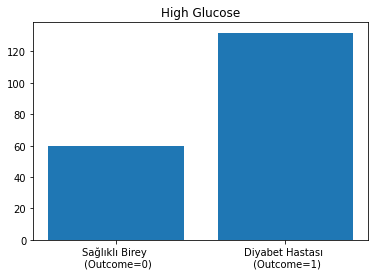

In [116]:
plt.bar(["Sağlıklı Birey \n (Outcome=0)","Diyabet Hastası \n (Outcome=1)"],x1 )
plt.title("High Glucose")
plt.show()

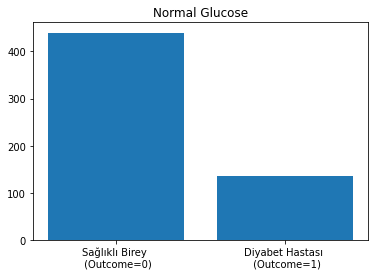

In [117]:
plt.bar(["Sağlıklı Birey \n (Outcome=0)","Diyabet Hastası \n (Outcome=1)"],x2 )
plt.title("Normal Glucose")
plt.show()

Grafikleri incelediğimizde tahmin ettiğimiz gibi bir sonuca ulaşırız. High glucose grubunda diyabet hastası (outcome=1), Normal glucose grubunda sağlıklı birey (outcome=0) sayılarının fazla olduğunu gözlemleriz.